In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    classification_report,
    confusion_matrix,
    roc_curve
)

pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

In [4]:
df = pd.read_csv("data/churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
print("Shape:", df.shape)
df.columns


Shape: (7043, 21)


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [9]:
df.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
df = df.dropna()
print("Shape after cleaning:", df.shape)

Shape after cleaning: (7032, 21)


In [11]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [12]:
df['Churn'].value_counts(normalize=True)


Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64

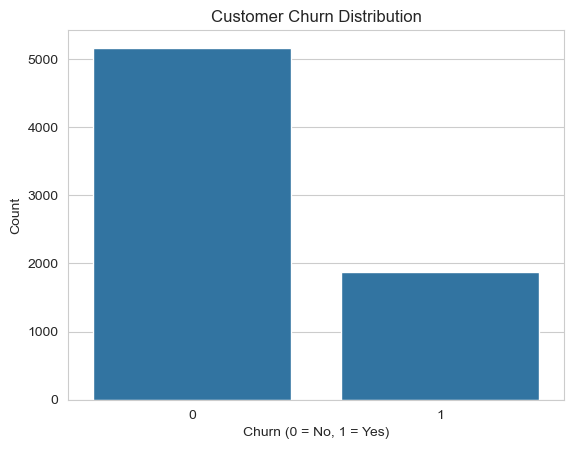

In [13]:
sns.countplot(x='Churn', data=df)
plt.title("Customer Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

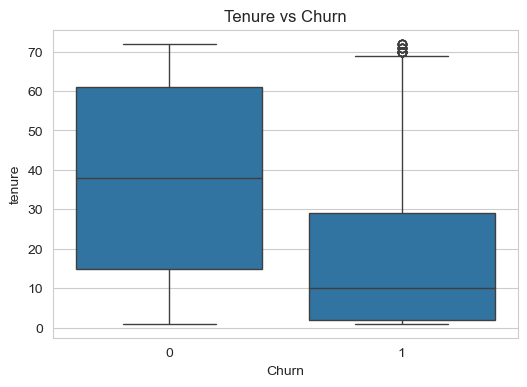

In [14]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure vs Churn")
plt.show()


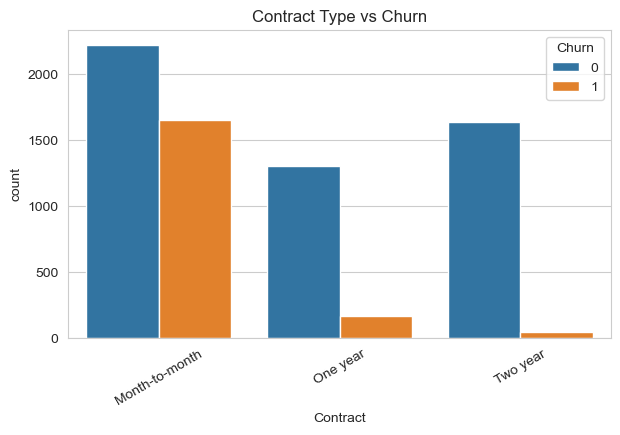

In [15]:
plt.figure(figsize=(7,4))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Contract Type vs Churn")
plt.xticks(rotation=30)
plt.show()


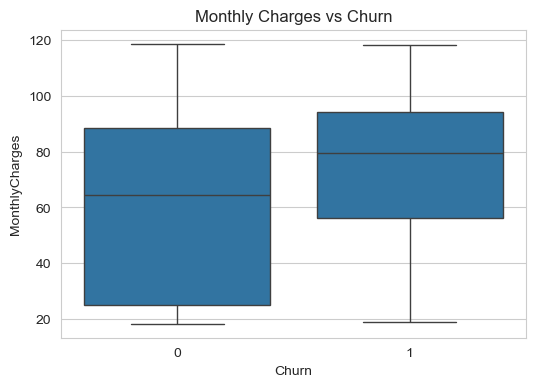

In [16]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

In [17]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [18]:
num_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = X.select_dtypes(include=['object', 'bool']).columns.tolist()

print("Numeric features:", num_features)
print("Categorical features:", cat_features)

Numeric features: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categorical features: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [20]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Drop customerID from categorical features
cat_features_model = [col for col in cat_features if col != 'customerID']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_features_model)
    ]
)


In [21]:
from sklearn.pipeline import Pipeline

def create_pipeline(model):
    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])


In [22]:
lr_pipeline = create_pipeline(LogisticRegression(max_iter=1000))
rf_pipeline = create_pipeline(RandomForestClassifier(n_estimators=200, random_state=42))
gb_pipeline = create_pipeline(GradientBoostingClassifier(n_estimators=200, random_state=42))


In [24]:
lr_pipeline.fit(X_train, y_train)
y_pred = lr_pipeline.predict(X_test)
y_prob = lr_pipeline.predict_proba(X_test)[:,1]

from sklearn.metrics import roc_auc_score
print("Logistic Regression ROC-AUC:", roc_auc_score(y_test, y_prob))

Logistic Regression ROC-AUC: 0.8360739966143986


In [25]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, random_state=42)
}

In [26]:
results = []

for name, model in models.items():
    pipe = create_pipeline(model)
    pipe.fit(X_train, y_train)
    
    y_pred = pipe.predict(X_test)
    y_prob = pipe.predict_proba(X_test)[:,1]
    
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob)
    })

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,ROC-AUC
0,Logistic Regression,0.805259,0.836074
1,Random Forest,0.786780,0.817219
2,Gradient Boosting,0.793177,0.839102


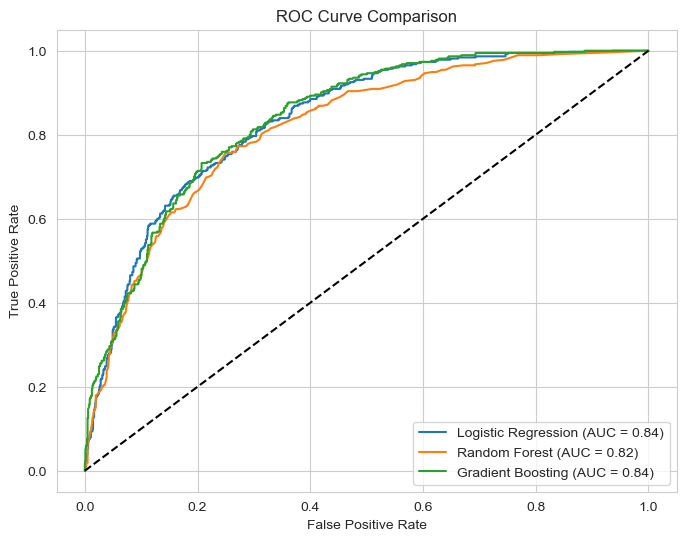

In [27]:
plt.figure(figsize=(8,6))

for name, model in models.items():
    pipe = create_pipeline(model)
    pipe.fit(X_train, y_train)
    y_prob = pipe.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


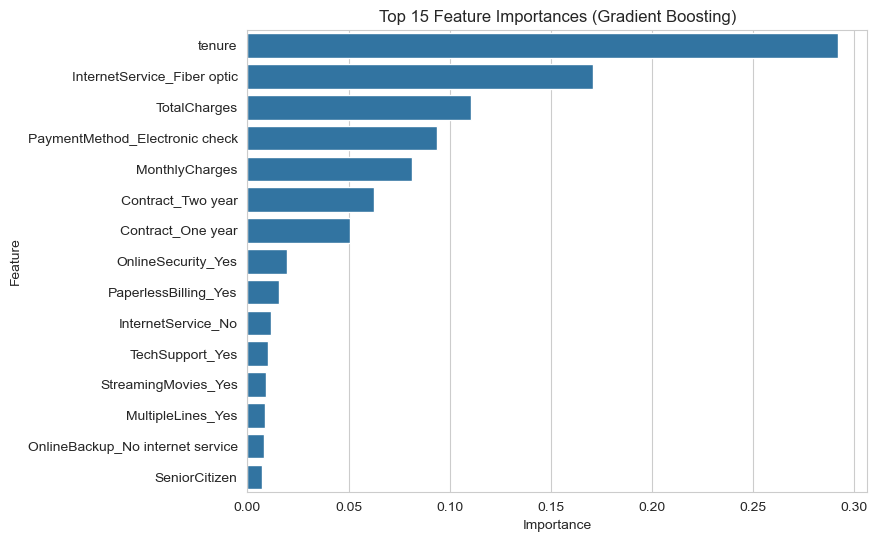

In [28]:
# Use Gradient Boosting as example
best_model = create_pipeline(GradientBoostingClassifier(n_estimators=200, random_state=42))
best_model.fit(X_train, y_train)

# Extract feature names after preprocessing
ohe_features = best_model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(cat_features_model)
all_features = list(num_features) + list(ohe_features)

# Feature importance
importances = best_model.named_steps['model'].feature_importances_
feat_imp = pd.DataFrame({'Feature': all_features, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False).head(15)

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title("Top 15 Feature Importances (Gradient Boosting)")
plt.show()


### Business Insights from Feature Importance

1. Contract type and tenure are the strongest drivers of churn.
2. Month-to-month contracts have the highest churn risk.
3. Customers with high monthly charges are more likely to churn.
4. Long-term contracts and senior customers show more loyalty.
5. Recommendation: Offer retention deals for high-risk customers (short tenure, month-to-month, high charges).


In [30]:
import shap

In [31]:
best_model = create_pipeline(
    GradientBoostingClassifier(n_estimators=200, random_state=42)
)
best_model.fit(X_train, y_train)

explainer = shap.Explainer(best_model.named_steps['model'])

X_transformed = best_model.named_steps['preprocessor'].transform(X_test)

shap_values = explainer(X_transformed)

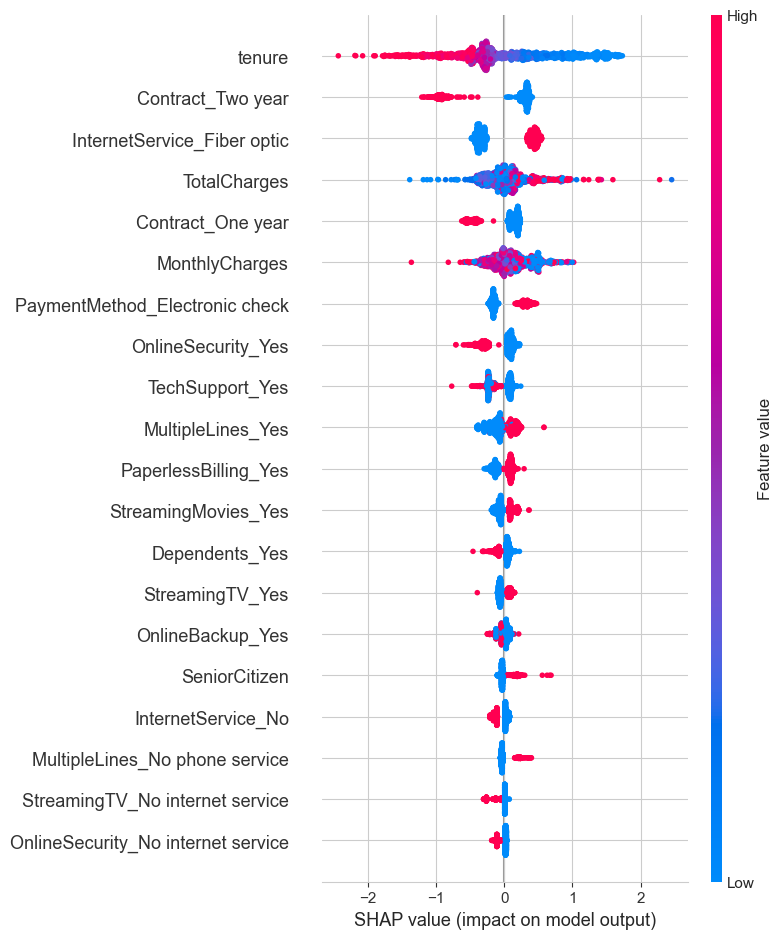

In [32]:
shap.summary_plot(shap_values, X_transformed, feature_names=all_features)


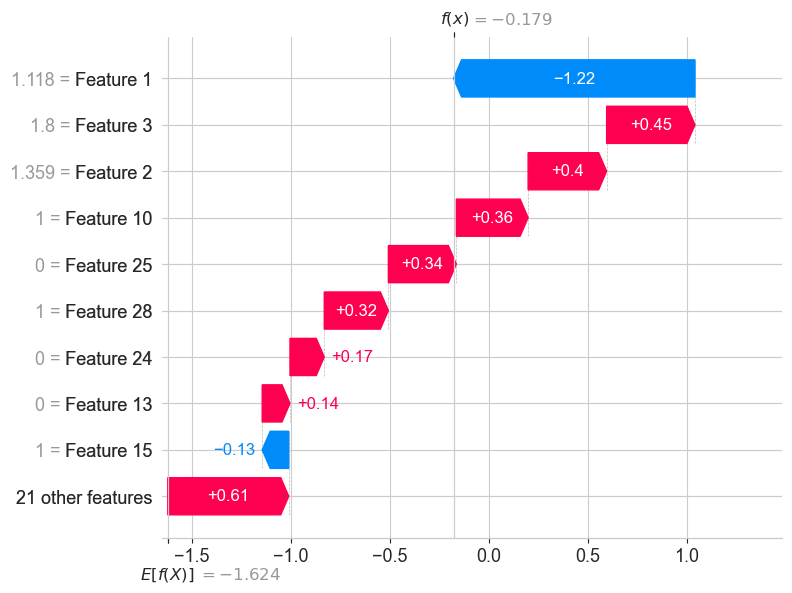

In [33]:
sample_idx = 5
shap.plots.waterfall(shap_values[sample_idx], max_display=10)
